In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio
import random

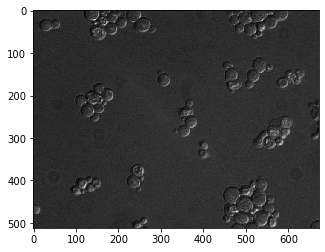

In [2]:
# raw_holo=cv2.imread(r'F:\Google chrome download\USAF_1.jpg',0)
raw_holo=cv2.imread(r'F:\Google chrome download\holo.png',0)
plt.imshow(raw_holo,'gray')

In [3]:
lamda=633e-9
k=2*np.pi/lamda

Lo=1650e-6;     #赋值衍射面(物)的尺寸,单位:米
holo=raw_holo[0:300,0:300]
r,c=holo.shape
print(r)
print(c)
# plt.imshow(holo,'gray')
#用T-FFT算法完成全息图记录过程的计算

xo=np.linspace(-Lo/2,Lo/2,c);#衍射面上和原像素点数相同
yo=np.linspace(-Lo/2,Lo/2,r);
xo,yo=np.meshgrid(xo,yo);#x,y转换成坐标

300
300


Lossy conversion from float64 to uint8. Range [-687166.3267509809, 1230014.5551589192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-667118.9651325452, 962418.6209838418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-628198.1906328519, 924314.8985349014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-625275.9405940255, 789136.8037803692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-556706.8321623397, 759667.8838921298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-661062.5654525382, 694376.6951107862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-664717.6326666351, 737513.7299723929]. 

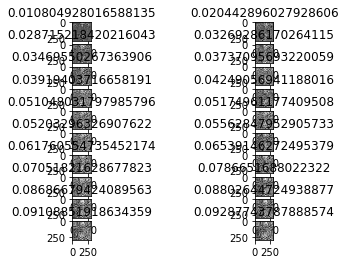

In [7]:
i=0
zo=0.01;    #物到全息记录面的距离,单位:米
while(i<20):
    i=i+1
    zo=zo+random.uniform(0,0.01)
    hfft=np.fft.fft2(holo)
    F1=np.exp(1j*k/2/zo*(xo*xo+yo*yo))
    fftF1=np.fft.fft2(F1);
    Fuf=hfft*fftF1;

    F0=np.exp(1j*k*zo)/(1j*lamda*zo)
    F=F0*np.fft.fftshift(np.fft.ifft2(Fuf));     #在全息记录面上的光场分布
    Ii=np.abs(F)                                #全息记录面上的光强分布
    # plt.title("衍射图"),plt.imshow(Ii,'gray')#衍射图

    #下面加入参考光
    alpha=np.pi/2.00;                  #参考光与x轴间的夹角
    beita=np.pi/2.02;                  #参考光与y轴间的夹角
    R=np.exp(1j*k*(xo*np.cos(alpha)+yo*np.cos(beita))); #参考光

    #下面计算参、物光在全息记录面上的干涉,得到全息图

    inter=F/np.max(np.sqrt(Ii))+R;   #调节光束比，并使参、物光干涉
    II= np.abs(inter);                 #干涉得到全息图,即光强
    # plt.imshow(II)                     #全息图

    II_Mean=np.mean(II);
    II = II-II_Mean;

    #plt.figure(figsize=(5,5))
    plt.subplot(10,2,i)
    plt.title(str(zo))
    plt.imshow(II,'gray') 
 
    imageio.imwrite('./holoimage/depth'+str(zo)+'.jpg', II)



True

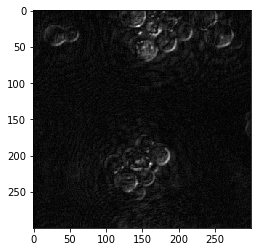

In [125]:
# %下面计算再现
# %先用S-FFT算法再现全息像
# % zi=1000*10^(-6);                      %全息图到观察面的距离,单位:米
# % Li=r*lamda*zi/Lo                %给出像面的尺寸,单位:米
# % x=linspace(-Li/2,Li/2,c);y=linspace(-Li/2,Li/2,r);
# % [x,y]=meshgrid(x,y);
# % F0=exp(j*k*zi)/(j*lamda*zi)*exp(j*k/2/zi*(x.^2+y.^2));
# % F=exp(j*k/2/zi*(xo.^2+yo.^2));  %用T-FFT算法得到的全息图尺寸与物面一致
# % % 取再现照明光垂直入射C=1
# % holo=Lo/r*Lo/c*fftshift(fft2(II.*F*1)); holo=holo.*F0;
# % Ii=holo.*conj(holo);


zi=0.01                           #赋值观察屏到衍射面的距离,单位:米
kethi=np.linspace( -1/2/Lo,1/2/Lo,c)*c; #给出频域坐标
nenta=np.linspace(-1/2/Lo,1/2/Lo,r)*r;
kethi,nenta=np.meshgrid(kethi,nenta);
H=np.exp(1j*k*zi*(1-lamda*lamda*(kethi*kethi+nenta*nenta)/2))*np.sqrt(1-lamda*lamda*(kethi*kethi+nenta*nenta)/2); #传递函数H
fa=np.fft.fftshift(np.fft.fft2(II*1));              #衍射面上光场的傅里叶变换
Fuf=fa*H;                            #光场的频谱与传递函数相乘
U=np.fft.ifft2(Fuf);                         #在观察屏上的光场分布
Ii=np.abs(U);                        #在观察屏上的光强分布
plt.imshow(Ii,'gray')                       #角谱再现象
cv2.imwrite('z1.bmp',Ii)

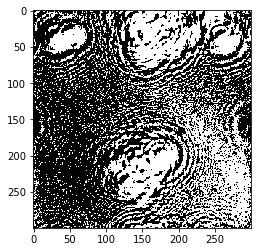

In [108]:
image=cv2.imread('z0.bmp',0)
plt.imshow(image,'gray')